In [1]:
import numpy as np
import pyemma
import matplotlib
import matplotlib.pyplot as plt
import pyemma.plots as mplt
import h5py
import MSMRD.trajectories.trajectoryTools as trajectoryTools
from MSMRD.discretization import partitionSphere
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rc('text', usetex='True')
plt.rc('font', family='serif')
%load_ext Cython

In [ ]:
# Cell not required anymore
%%cython
import numpy as np
cimport numpy as np
cdef extern from "math.h":
    double atan2(double y, double x)
    double acos(double x)
    double sqrt(double x)
cdef double PI = np.pi

In [3]:
# Testing correct state output mini script (use along with testSpherePrtitionPlot NB)
# Consistent with test
numPartitions = 20
boxSize = 5
minima = np.array([[-0.9,0.7,0.3] , [-0.1,0.9,0.7],  [0.8,0.8,-0.8],  \
                  [-1.0,-0.3,-0.4], [0.0,0.0,0.0],   [0.9,-0.1,-0.9], \
                  [-0.7,-1.0,-0.3], [0.0,-0.9,0.1],  [0.8,-0.2,0.8]])
regionsPerCollar, phis, thetas = partitionSphere(numPartitions)
discretizer = trajectoryTools.trajDiscretization3DCython(minima, boxSize)
discretizer.getSpherePartition(regionsPerCollar, phis, thetas)
coord = np.array([2.5*1.0,2.5*0.1,2.5*1.0])
coord = np.array([-3.0,-7.5,+0.3])
sphereState = discretizer.getStatePy(coord,-1) - (len(minima) - 1)
print sphereState

12


In [4]:
%%time
numfiles = 1 #200
# Load partitions, boxsize and minimas
numPartitions = 322
boxSize = 5
regionsPerCollar, phis, thetas = partitionSphere(numPartitions)
minima = np.array([[-0.9,0.7,0.3] , [-0.1,0.9,0.7],  [0.8,0.8,-0.8],  \
                  [-1.0,-0.3,-0.4], [0.0,0.0,0.0],   [0.9,-0.1,-0.9], \
                  [-0.7,-1.0,-0.3], [0.0,-0.9,0.1],  [0.8,-0.2,0.8]])

# Extract trajectories from file using asym2Dtraj class
fname = '../data/asym3D/3DasymTrajs_pBox5_sf2_R4_RT1e7_dt001_si10_'
dimension = 3
discretizer = trajectoryTools.trajDiscretization3DCython(minima, boxSize)
discretizer.getSpherePartition(regionsPerCollar, phis, thetas)
dTrajs = []
#fullDTrajs = []
truncTrajs = []
dTruncTrajs = []
i = 0
samplingInterval = 10 # in the original computation
for number in range(numfiles):
    f = h5py.File(fname + str(number) + '.h5', 'r')
    data = np.array(f['traj'], dtype=float)
    f.close()
    if not np.allclose(data[1:,0]-data[:-1,0], samplingInterval):
        print 'timestep not constant'
    traj = data[:,1:dimension+1]
    #fullDTrajs.append(discretizer.getdTrajs([traj]))
    dTrajs += discretizer.getdTrajs([traj])
    lastTruncTrajs = discretizer.getTruncatedTraj(traj, prepend=True)
    truncTrajs += lastTruncTrajs
    dTruncTrajs += discretizer.getdTrajs(lastTruncTrajs)
    i+=1
    if i % 10 == 0:
        print str(i/float(numfiles) * 100)+'% done'
    # delete memory to avoid overhead
    del data
    del traj

CPU times: user 22.1 s, sys: 40 ms, total: 22.2 s
Wall time: 22.2 s


In [9]:
its = pyemma.msm.its(dTrajs, lags = 20)

(array([ -20.,    0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 7 Text yticklabel objects>)

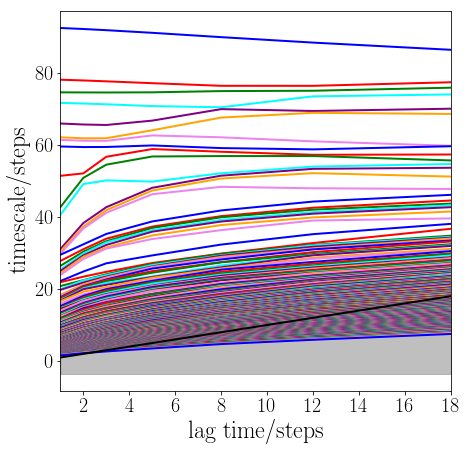

In [11]:
# Plot implied time scales
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2, dt=1)
plt.ylabel(r"timescale/steps", fontsize = 24)
plt.xlabel(r"lag time/steps", fontsize = 24)
#plt.xlim(0,900)
#plt.ylim(-100,1700)
#plt.xlim(0,100)
#plt.ylim(100,10000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [13]:
# Get exit/entry lookup tables
#%%time
entryTrajsStart, entryTrajsEnd, entryTimes = discretizer.getLookupTableEntry(dTruncTrajs, truncTrajs)
exitPositions, exitTimes = discretizer.getLookupTableExit(dTruncTrajs, truncTrajs)

In [18]:
exitTimes

[[31,
  74,
  42,
  41,
  92,
  86,
  118,
  60,
  92,
  113,
  70,
  17,
  70,
  42,
  53,
  191,
  32,
  61,
  145,
  29,
  75,
  34,
  60,
  22,
  61,
  47,
  69,
  137,
  179,
  130,
  246,
  64,
  99,
  63,
  47,
  38,
  121,
  50,
  95,
  110,
  58,
  71,
  103,
  95,
  17,
  112,
  27,
  46,
  29,
  42,
  24,
  93,
  25,
  142,
  62,
  128,
  52,
  89,
  93,
  37,
  31,
  69,
  96,
  55,
  26,
  73,
  50,
  220,
  37,
  183,
  17,
  27,
  174,
  19,
  61,
  31,
  33,
  219,
  38,
  68,
  33,
  117,
  153,
  37,
  47,
  33,
  34,
  15,
  57,
  71,
  11,
  29,
  22,
  25,
  440,
  104,
  77,
  182,
  110,
  170,
  112,
  59,
  28,
  18,
  66,
  103,
  70,
  80,
  34,
  203,
  18,
  54,
  40,
  85,
  204,
  68,
  88,
  71,
  109,
  65,
  50,
  12,
  137,
  44,
  66,
  42,
  25,
  41,
  42,
  95,
  20,
  30,
  116,
  114,
  47,
  128,
  64],
 [69,
  83,
  85,
  103,
  69,
  130,
  63,
  120,
  72,
  104,
  20,
  42,
  69,
  59,
  188,
  73,
  54,
  119,
  100,
  21,
  44,
  28,
  29